# 1D Plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
d1 = np.loadtxt("data/example_1.txt")
d2 = np.loadtxt("data/example_2.txt")

print(d1.shape, d2.shape)

(500,) (500,)


## Histograms

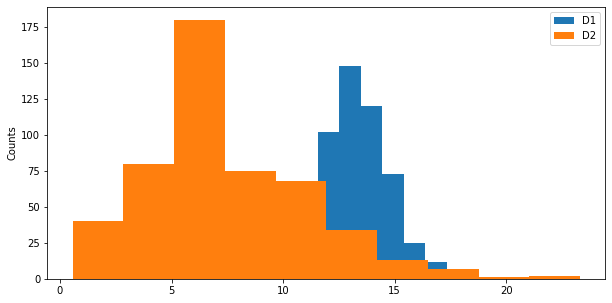

In [4]:
plt.figure(figsize=(10,5))
plt.hist(d1, label="D1")
plt.hist(d2, label="D2")
plt.legend()
plt.ylabel("Counts");

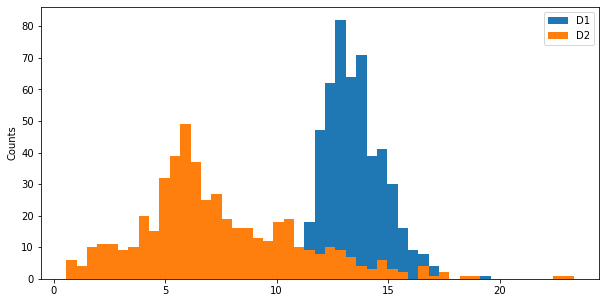

In [5]:
# Create the optimal number of bins for each distribution
plt.figure(figsize=(10,5))
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
counts1, _, _ = plt.hist(d1, bins=bins, label="D1")
plt.hist(d2, bins=bins, label="D2")
plt.legend()
plt.ylabel("Counts");

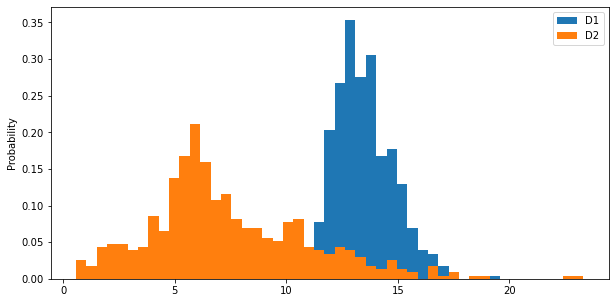

In [6]:
# Use density
plt.figure(figsize=(10,5))
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
counts1, _, _ = plt.hist(d1, bins=bins, label="D1", density=True)
plt.hist(d2, bins=bins, label="D2", density=True)
plt.legend()
plt.ylabel("Probability");

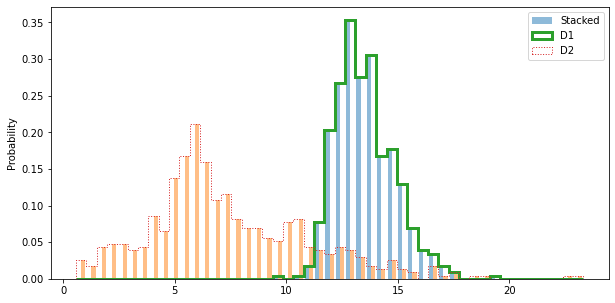

In [7]:
# Use density
plt.figure(figsize=(10,5))
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plt.hist([d1, d2], bins=bins, label="Stacked", density=True, alpha=0.5)
plt.hist(d1, bins=bins, label="D1", density=True, histtype="step", lw=3)
plt.hist(d2, bins=bins, label="D2", density=True, histtype="step", ls=":")
plt.legend()
plt.ylabel("Probability");

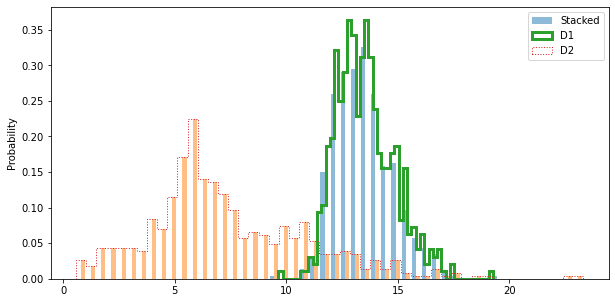

In [8]:
plt.figure(figsize=(10,5))
bins = 50
plt.hist([d1, d2], bins=bins, label="Stacked", density=True, alpha=0.5)
plt.hist(d1, bins=bins, label="D1", density=True, histtype="step", lw=3)
plt.hist(d2, bins=bins, label="D2", density=True, histtype="step", ls=":")
plt.legend()
plt.ylabel("Probability");

---
## Bee Swarm

In [9]:
dataset = pd.DataFrame({
    "value": np.concatenate((d1, d2)),
    "type": np.concatenate((np.ones(d1.shape), np.zeros(d2.shape)))
})

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
 1   type    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


<AxesSubplot:xlabel='value'>

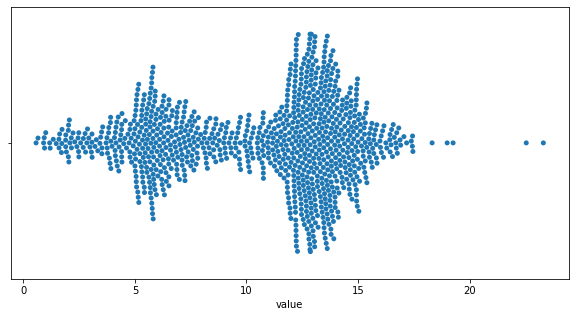

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.swarmplot(x="value", data=dataset, ax=ax)

/Users/morgan/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='value', ylabel='value'>

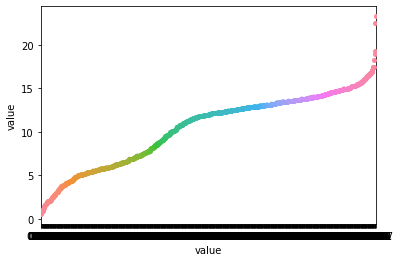

In [15]:
# fig, ax = plt.subplots(figsize=(10,5))
sns.swarmplot(x="value", y="value", data=dataset)

---
## Box Plots

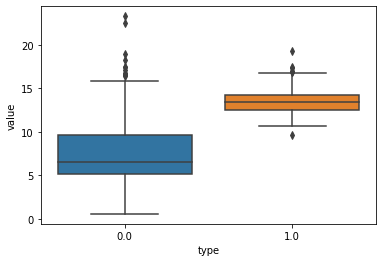

In [16]:
sns.boxplot(x="type", y="value", data=dataset);

*****
## Violin Plot

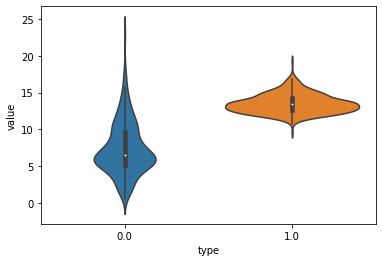

In [17]:
sns.violinplot(x="type", y="value", data=dataset);

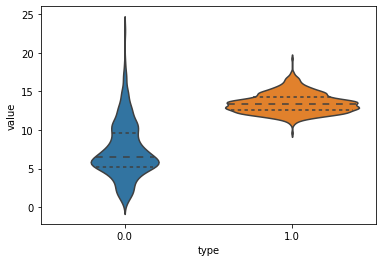

In [19]:
# Add quartiles
# "bw" is used to adjust smoothing
sns.violinplot(x="type", y="value", data=dataset, inner="quartile", bw=0.2);

---
## Empirical Cumulative Distribution Functions

- Solves the problem of selecting the right number of bins.

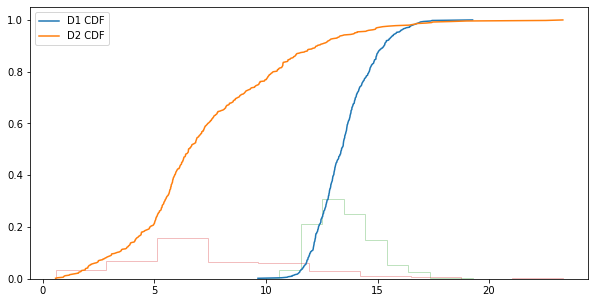

In [22]:
sd1 = np.sort(d1)
sd2 = np.sort(d2)
cdf = np.linspace(1/d1.size, 1, d1.size)

plt.figure(figsize=(10,5))
plt.plot(sd1, cdf, label="D1 CDF")
plt.plot(sd2, cdf, label="D2 CDF")
plt.hist(d1, histtype="step", density=True, alpha=0.3)
plt.hist(d2, histtype="step", density=True, alpha=0.3)
plt.legend();

---
## Describe

In [23]:
df = pd.DataFrame({"Data1": d1, "Data2": d2})
df.describe()

,Data1,Data2
count,500.000000,500.000000
mean,13.511172,7.390714
std,1.296363,3.589993
min,9.640000,0.568000
25%,12.572000,5.164750
50%,13.389500,6.531000
75%,14.291250,9.664500
max,19.262000,23.307000
